# Working memory dataset: looking at individual differences

In [1]:
import sys

import numpy as np
import pandas as pd
from pathlib import Path
import os
import nibabel as nb
import nitools as nt
import PcmPy as pcm
import seaborn as sb

# modules from functional fusion
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
# modules from connectivity
import selective_recruitment.rsa as rsa
import selective_recruitment.recruite_ana as sr
import selective_recruitment.globals as gl
import selective_recruitment.plotting as plotting
import selective_recruitment.scripts.script_prep_sc as ss
import seaborn as sns

Goal is to relate subjects' strategies for reversing the order to brain activations

### 1. average cerebellar BOLD activation

In [2]:
D = sr.get_summary(dataset = "WMFS", 
                ses_id = 'ses-02', 
                type = "CondRun", 
                cerebellum_space = 'SUIT3',
                cortex_space = 'fs32k',
                cerebellum_roi =None,
                cortex_roi = None,
                add_rest = True)

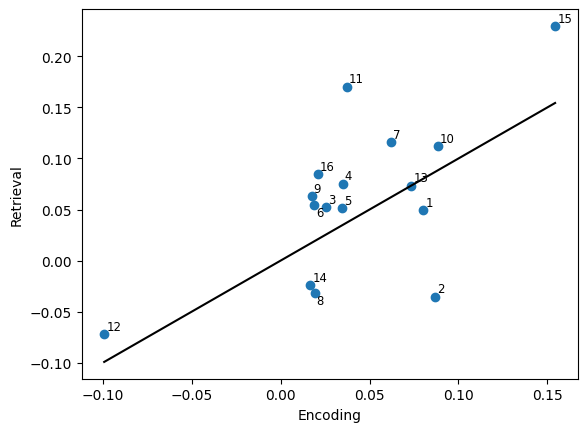

In [3]:
A=pd.pivot_table(D,values='Y',index='sn',columns=['phase'])
sn_str = pd.Series([f'{i+1:.0f}' for i in A.index])
plt.figure()
plt.scatter(A[0], A[1])
plotting.annotate(A, x = 0, y = 1, labels = sn_str, text_size = 'small', text_weight = 'regular')
plt.xlabel('Encoding')
plt.ylabel('Retrieval')

# draw y = x as reference
xp = np.linspace(min(A[0]), max(A[0]))
yp = xp.copy()
plt.plot(xp, yp, color = "black")

Figure. plots average overal activation in the cerebellum during retrieval vs encoding. y = x line is drawn as a reference. subjects on y = x are those that have activated the cerebellum (on average) equally during encoding and retrieval. The subjects that are below the y = x line are those that have higher BOLD activation during encoding compared to retrieval. And subjects above the y = x line are those that have higher BOLD activation during retrieval. Overally, the majority of subjects are showing higher activations during retrieval and this is mostly in consistent with the verbal strategy that the subject has provided: Most subjects have reported doing reversal during retreival! Except for sub-15, sub-16, and sub-07 who have reported doing the reversal during encoding, the rest of the subjects above the y = x line have repoorted reversal during retreival. For subjects below the line it's not as straight forward as two have reported reversal during encoding and two have reported reversal during retreival.

**reversal of digits is an extra operation that seems to be requiring more energy**

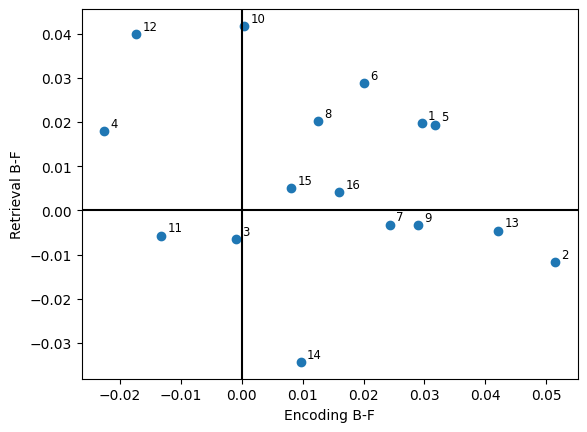

In [4]:
B=pd.pivot_table(D,values='Y',index='sn',columns=['phase','recall'])
enc_bf=B[0][0]-B[0][1]
ret_bf=B[1][0]-B[1][1]

# out data into a dataframe
df = pd.DataFrame()
df["enc_bf"] = enc_bf
df["ret_bf"] = ret_bf
plt.figure()
plt.scatter(enc_bf, ret_bf)
plotting.annotate(df, x = "enc_bf", y = "ret_bf", labels = sn_str, text_size = 'small', text_weight = 'regular')
plt.xlabel('Encoding B-F')
plt.ylabel('Retrieval B-F')
plt.axvline(0, color = "black")
plt.axhline(0, color = "black")


### 2. average cerebellar BOLD activation within parcels
Starting with the integrated hierarchical parcellation

In [5]:
D = ss.get_summary_conn(dataset = "WMFS", 
                ses_id = 'ses-02', 
                type = "CondRun", 
                cerebellum_roi ='NettekovenSym68c32',
                cortex_roi = "Icosahedron1002",
                add_rest = True)

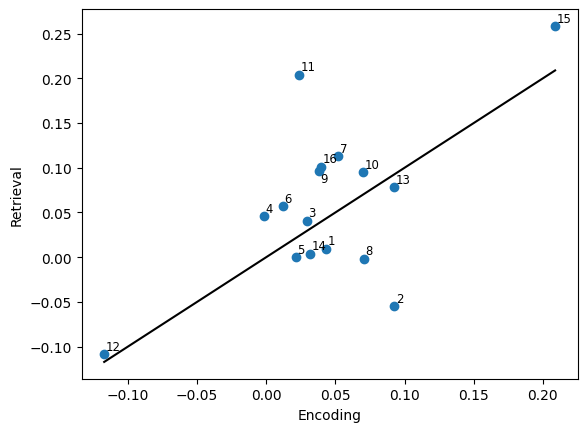

In [6]:
# get the dataframe for a certain ROI
roi_name = "D2R"

A=pd.pivot_table(D.loc[D.roi_name == roi_name],values='Y',index='sn',columns=['phase'])
sn_str = pd.Series([f'{i+1:.0f}' for i in A.index])
plt.figure()
plt.scatter(A[0], A[1])
plotting.annotate(A, x = 0, y = 1, labels = sn_str, text_size = 'small', text_weight = 'regular')
plt.xlabel('Encoding')
plt.ylabel('Retrieval')

# draw y = x as reference
xp = np.linspace(min(A[0]), max(A[0]))
yp = xp.copy()
plt.plot(xp, yp, color = "black")


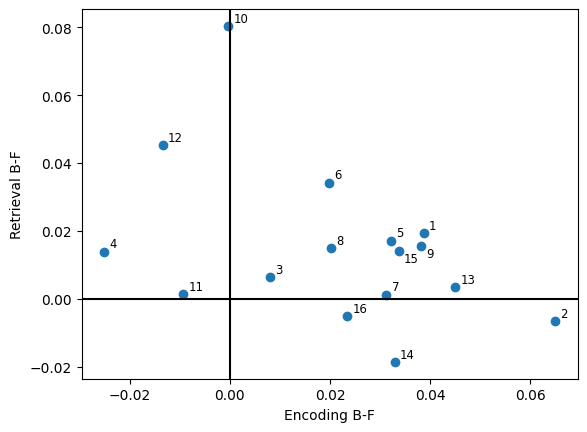

In [7]:
B=pd.pivot_table(D.loc[D.roi_name == roi_name],values='Y',index='sn',columns=['phase','recall'])
enc_bf=B[0][0]-B[0][1]
ret_bf=B[1][0]-B[1][1]

# out data into a dataframe
df = pd.DataFrame()
df["enc_bf"] = enc_bf
df["ret_bf"] = ret_bf
plt.figure()
plt.scatter(enc_bf, ret_bf)
plotting.annotate(df, x = "enc_bf", y = "ret_bf", labels = sn_str, text_size = 'small', text_weight = 'regular')
plt.xlabel('Encoding B-F')
plt.ylabel('Retrieval B-F')
plt.axvline(0, color = "black")
plt.axhline(0, color = "black")
